In [13]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Data preprocessing is the process of converting or mapping data from the initial 'raw' form into another format, in order to prepare the data for further analysis. Data preprocessing is also known as data cleaning or data wrangling. 

In [14]:
import pandas as pd
import numpy as np

filepath = "/content/gdrive/My Drive/DATA/Automobiles.csv"
data = pd.read_csv(filepath)
data.head(n=10)
data[['Length', 'Compression-Ratio']].describe()
data[['Bore', 'Stroke']].describe()
data['Symboling'] #Panda series
data['Bore']

#Adding one to each value of a column
#data['Bore'] = data['Bore'] + 1


0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: Bore, Length: 205, dtype: object

In [15]:
#Dealing with missing values

#Removing data that contains missing values
#.dropna() function can help you drop rows or columns with missing data

#The following two statements are equivalent
data.dropna(subset = ['Price'], axis=0)
#data = data.dropna(subset = ['Price'], axis = 0)

#Replacing missing values like NaN with actual values
#Calculating mean of the column

#data = data.replace('?', np.nan, inplace = True)
data = data.replace('?', np.nan)
mean = data[['Normalized-Losses']].mean()
data[['Normalized-Losses']].replace(np.nan, mean, inplace = True)

#Converting data formats/units/metrics
#Convert 'Miles per Gallon' to 'Liters per 100 KM'
data.head()
data['City-MPG'] = 235/data['City-MPG']
#Rename column name
data.rename(columns = {'City-MPG' : 'City-LtrsPerKM'}, inplace = True)

data.dtypes
#Convert 'Price' column from Object to Int64
data[['Price']] = data[['Price']].astype("float")

data.dtypes

data["Highway-MPG"] = 235/data["Highway-MPG"]
data.rename(columns = {"Highway-MPG":"Highway-LtrsPerKM"}, inplace = True)

data.head(20)
data.columns.values.tolist()

['Unnamed: 0',
 'Symboling',
 'Normalized-Losses',
 'Make',
 'Fuel-Type',
 'Aspiration',
 'Num-of-Doors',
 'Body-Style',
 'Drive-Wheels',
 'Engine-Location',
 'Wheel-Base',
 'Length',
 'Width',
 'Height',
 'Curb-Weight',
 'Engine-Type',
 'Num-of-Cylinders',
 'Engine-Size',
 'Fuel-System',
 'Bore',
 'Stroke',
 'Compression-Ratio',
 'Horsepower',
 'Peak-RPM',
 'City-LtrsPerKM',
 'Highway-LtrsPerKM',
 'Price']

In [16]:
#Data Normalization

#Using the feature scaling method
data["Length"] = data["Length"]/data["Length"].max() #Pandas method max

#Using the Min-Max method
#data["Length"] = (data["Length"] - data["Length"].min()) / (data["Length"].max() - data["Length"].min())

#Using Normalization or Standardisation
#data["Length"] = (data["Length"] - data["Length"].mean()) / data["Length"].std()



/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([171.,  18.,  12.]),
 array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ]),
 <a list of 3 Patch objects>)

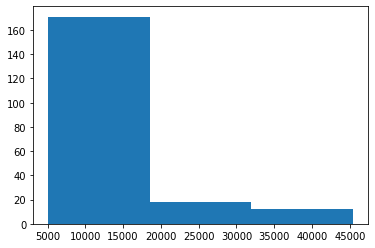

In [17]:
#Binning

bins = np.linspace(min(data["Price"]), max(data["Price"]), 4)
group_names = ["Low", "Medium", "High"]
data["Price-Binned"] = pd.cut(data["Price"], bins, labels = group_names, include_lowest = True)

import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.hist(data.Price, bins = 3)

In [18]:
#Categorical variables into quantitative variables
#One-hot encoding 

pd.get_dummies(data["Fuel-Type"])

data.head()



,Unnamed: 0,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-LtrsPerKM,Highway-LtrsPerKM,Price,Price-Binned
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,13495.0,Low
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,16500.0,Low
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,9.038462,16500.0,Low
3,3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,7.833333,13950.0,Low
4,4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,10.681818,17450.0,Low


In [22]:
#Evaluating missing data

#Identifying missing values
#.isnull()
#.notnull()

missing_data = data.isnull()
missing_data.head(5)

#Count missing values in each column
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts()) #value_counts() counts the number of True values
  print("")

data.columns.tolist() #Returns headers of the columns
data.columns.values.tolist() #Returns the headers of the columns
list(data)

#Dealing with missing data

#1 - Calculating the average of the column
avg_normalized_losses = data["Normalized-Losses"].astype("float").mean(axis = 0)
print("Average normalized losses: ", avg_normalized_losses)

#Replace NaN in the 'Normalized-Losses' column with the average value
data["Normalized-Losses"].replace(np.nan, avg_normalized_losses, inplace = True)

#Calculate the mean value of the 'Bore' column
avg_bore = data["Bore"].astype("float").mean(axis = 0)
print("Average bore: ", avg_bore)

data.head()
data["Bore"].replace(np.nan, avg_bore, inplace = True)
data["Bore"].head(20)

avg_stroke = data["Stroke"].astype("float").mean(axis = 0)
data["Stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = data["Horsepower"].astype("float").mean(axis = 0)
data["Horsepower"].replace(np.nan, avg_horsepower, inplace = True)

avg_peak_rpm = data["Peak-RPM"].astype("float").mean(axis = 0)
print("Average peak RPM: ", avg_peak_rpm)
data["Peak-RPM"].replace(np.nan, avg_peak_rpm, inplace = True)

data["Num-of-Doors"].value_counts()
data["Num-of-Doors"].value_counts().idxmax()
data["Num-of-Doors"].replace(np.nan, "four", inplace = True)
data["Num-of-Doors"].head(50)

#Dropping all rows that do not have price data
data.dropna(subset=["Price"], axis = 0, inplace = True)

#Reset index
data.reset_index(drop = True, inplace = True)
data.head()



'four'

In [23]:
#Data formats
data.dtypes
data[['Bore', 'Stroke']] = data[['Bore', 'Stroke']].astype("float")
data["Normalized-Losses"].replace(np.nan, avg_normalized_losses, inplace = True)
data[['Normalized-Losses']] = data[['Normalized-Losses']].astype("int")
data[["Price"]] = data[["Price"]].astype("float")
data[["Peak-RPM"]] = data[["Peak-RPM"]].astype("float")
data.dtypes

Unnamed: 0              int64
Symboling               int64
Normalized-Losses       int64
Make                   object
Fuel-Type              object
Aspiration             object
Num-of-Doors           object
Body-Style             object
Drive-Wheels           object
Engine-Location        object
Wheel-Base            float64
Length                float64
Width                 float64
Height                float64
Curb-Weight             int64
Engine-Type            object
Num-of-Cylinders       object
Engine-Size             int64
Fuel-System            object
Bore                  float64
Stroke                float64
Compression-Ratio     float64
Horsepower             object
Peak-RPM              float64
City-LtrsPerKM        float64
Highway-LtrsPerKM     float64
Price                 float64
Price-Binned         category
dtype: object

In [27]:
#Data Standardisation

#Data standardisation is the conversion of data values to a common format that makes comparisons more meaningful
data["Length"] = data["Length"]/data["Length"].max()
data["Width"] = data["Width"]/data["Width"].max()
data["Width"]
data["Height"] = data["Height"]/data["Height"].max()
data[["Height", "Width", "Length"]].head(10)

#Binning is the process of transforming continuous numerical values into dicsrete categorical bins for grouped analysi

data["Horsepower"] = data["Horsepower"].astype("int", copy = True)
data.dtypes


Unnamed: 0              int64
Symboling               int64
Normalized-Losses       int64
Make                   object
Fuel-Type              object
Aspiration             object
Num-of-Doors           object
Body-Style             object
Drive-Wheels           object
Engine-Location        object
Wheel-Base            float64
Length                float64
Width                 float64
Height                float64
Curb-Weight             int64
Engine-Type            object
Num-of-Cylinders       object
Engine-Size             int64
Fuel-System            object
Bore                  float64
Stroke                float64
Compression-Ratio     float64
Horsepower              int64
Peak-RPM              float64
City-LtrsPerKM        float64
Highway-LtrsPerKM     float64
Price                 float64
Price-Binned         category
dtype: object

Text(0.5, 1.0, 'Horsepower Bins')

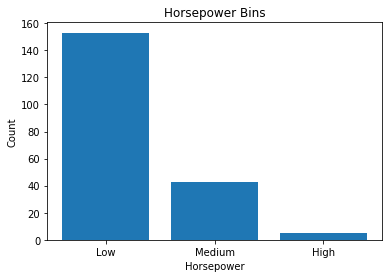

In [32]:
#Plotting the distribution of horsepower using a histogram

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot
mpl.pyplot.hist(data["Horsepower"])

#Set X/Y labels and plot title
mpl.pyplot.xlabel("Horsepower")
mpl.pyplot.ylabel("Count")
mpl.pyplot.title("Horsepower Bins")

#bins = np.linspace(data["Horsepower"].max(), data["Horsepower"].min(), 4)
bins = np.linspace(min(data["Horsepower"]), max(data["Horsepower"]), 4)
bins
group_names = ["Low", "Medium", "High"]
data["Horsepower-Binned"] = pd.cut(data["Horsepower"], bins, labels = group_names, include_lowest = True)
data[["Horsepower","Horsepower-Binned"]].head(20)

#Number of values in each bin
data["Horsepower-Binned"].value_counts()

#Plotting the distribution in each bin
plt.hist(data["Horsepower-Binned"], 3)
plt.xlabel("Horsepower")
plt.ylabel("Counts")
plt.title("Horsepower Bins")

#Plotting the distribution in each bin
pyplot.bar(group_names, data["Horsepower-Binned"].value_counts())

#Set X/Y labels and plot title
mpl.pyplot.xlabel("Horsepower")
mpl.pyplot.ylabel("Count")
mpl.pyplot.title("Horsepower Bins")


<h1>Indicator Variable or Dummy Variable</h1>

<p>An indicator variable is a numerical variable used to label categories. They are called 'dummies' because the number themselves don't have any inherent meaning. Dummy variables are used in order to analyse using regression. 

In [44]:
data.columns
dummy_variables1 = pd.get_dummies(data["Fuel-Type"])
dummy_variables1.head(20)

#Changing column names
dummy_variables1.rename(columns = {"gas":"Fuel-Type-Gas", "diesel":"Fuel-Type-Diesel"}, inplace = True)
dummy_variables1.head(10)

#Merge dummy_variables1 with data
data = pd.concat([data, dummy_variables1], axis = 1)

#Drop column 'Fuel-Type' from the dataframe
data.drop("Fuel-Type", axis = 1, inplace = True)
data.head(20)

,Unnamed: 0,Symboling,Normalized-Losses,Make,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-LtrsPerKM,Highway-LtrsPerKM,Price,Price-Binned,Horsepower-Binned,Fuel-Type-Diesel,Fuel-Type-Gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Low,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,Low,0,1
5,5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0,Low,Low,0,1
6,6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,17710.0,Low,Low,0,1
7,7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,18920.0,Medium,Low,0,1
8,8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500.0,13.823529,11.750000,23875.0,Medium,Medium,0,1
9,10,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800.0,10.217391,8.103448,16430.0,Low,Low,0,1


In [54]:
#Create dummy variables for 'Aspiration'
dummy_variables2 = pd.get_dummies(data["Aspiration"])
dummy_variables2.head(20)
dummy_variables2.rename(columns = {"std":"Standard", "turbo":"Turbo"}, inplace = True)
dummy_variables2.head(20)
data = pd.concat([data, dummy_variables2], axis = 1)
data.head(20)
data.drop("Aspiration", axis = 1, inplace = True)
data.head(20)

#Save to new .CSV
data.to_csv("/content/gdrive/My Drive/DATA/Automobiles-Processed.csv")